**Completed the facebook (Graph) assignment using networkx library and following are the details.**

1.) Number of Nodes.
2.) Number of edges.
3.) Number of communities.
4.) Nodes in Biggest and smallest communities.
5.) Number of triangles in the network.
6.) Centrality.
7.) clustering_dict.
8.) avg_neighbor_degree_dict.
9.) Adjacency view of a graph.
10.) The eccentricity of a node.
11.) Kemeny constant and one hope connections

**Implemented the clustering algorithms with Data visualization based on above details of graph using NetworkX.**

12.) Silhouette Scoring.
13.) PCA (Principal Component Analysis).
14.) K-Means clustering with k=3 and k=4.
15.) DBSCAN.
16.) Dendrogram for Hierarchical Clustering.
17.) Davies-Bouldin Score.
18.) Calinski-Harabasz Index.
19.) Rand Index and Adjusted Rand Index.
20.) Silhouette Score.
21.) OPTICS (Ordering Points To Identify the Clustering Structure).
22.) BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)

**References.**
1. https://soumenatta.medium.com/networkx-a-practical-introduction-to-graph-analysis-in-python-cc72f3dda916
2. https://snap.stanford.edu/data/ego-Facebook.html
3. https://networkx.org/documentation/stable/tutorial.html
4. https://huggingface.co/blog/intro-graphml

In [ ]:
!pip install node2vec
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import community
from sklearn.cluster import Birch
from sklearn.cluster import OPTICS
from itertools import combinations
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from node2vec import Node2Vec
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, silhouette_score
from sklearn.metrics import adjusted_rand_score as rand_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage

G = nx.read_edgelist('/content/sample_data/facebook_combined.txt')



In [2]:
# Perform community detection using label propagation
communities = list(nx.algorithms.community.label_propagation_communities(G))

print("Length of communities:", len(communities))
print("First 5 elements of communities:", communities[:5])

# Calculate the number of Nodes
print ("Reference URL - https://snap.stanford.edu/data/ego-Facebook.html")
print("Total number of Nodes:", len(G))

# Calculate the number of edges
num_edges = G.number_of_edges()
print("Total number of edges:", num_edges)

# Print the total number of communities
print("Total number of communities:", len(communities))

# Find the biggest and smallest communities
biggest_community = max(communities, key=len)
smallest_community = min(communities, key=len)
centralities = nx.degree_centrality(G)
clustering_dict = nx.clustering(G)
avg_neighbor_degree_dict = nx.average_neighbor_degree(G)

# Find the number of triangles in the network
triangles = sum(nx.triangles(G).values()) / 3

# Print the adjacency view of a graph
adj_list = dict(G.adj)
adj_df = pd.DataFrame(list(adj_list.items()), columns=['Node', 'Neighbors'])

print("Number of nodes in the smallest community:", len(smallest_community))
print("Number of nodes in the biggest community:", len(biggest_community))
print("Smallest Community nodes details:", smallest_community)
print("Biggest Community nodes details:", biggest_community)
print("centralities:", centralities)
print("clustering_dict:", clustering_dict)
print("avg_neighbor_degree_dict:", avg_neighbor_degree_dict)
print("Number of triangles in the network:", triangles)
print("Adjacency view:",pd.concat([adj_df.head(2), adj_df.tail(2)]))
print("================================================================================================")
# Print the detected communities list
# for i, community in enumerate(sorted(communities, key=len)):
#     print(f"Community {i+1}: {community}, Number of nodes: {len(community)}")
data = []
for i, community in enumerate(sorted(communities, key=len)):
    data.append([i+1, community, len(community)])

df = pd.DataFrame(data, columns=['Community', 'Nodes', 'Number of nodes'])

# Print the header and tail of the top 5 communities
header_tail = pd.concat([df.head(), df.tail()])
print(header_tail)

Length of communities: 44
First 5 elements of communities: [{'72', '128', '345', '74', '292', '88', '30', '313', '142', '329', '129', '308', '239', '18', '148', '228', '250', '231', '141', '39', '304', '130', '277', '224', '76', '200', '202', '190', '1', '120', '322', '0', '126', '21', '203', '77', '270', '125', '169', '191', '295', '331', '267', '334', '119', '188', '103', '236', '222', '123', '323', '338', '183', '287', '29', '252', '11', '124', '60', '85', '82', '121', '211', '215', '166', '105', '336', '288', '96', '303', '176', '269', '172', '81', '298', '109', '324', '339', '315', '40', '73', '221', '106', '268', '7', '311', '161', '286', '342', '318', '114', '13', '271', '247', '212', '67', '156', '297', '12', '208', '207', '210', '45', '79', '153', '164', '257', '157', '117', '325', '155', '209', '213', '59', '170', '238', '340', '234', '38', '134', '9', '248', '272', '332', '133', '118', '65', '260', '61', '265', '206', '26', '232', '56', '301', '10', '347', '317', '122', '290

In [3]:
# The eccentricity of a node 'v' in graph 'G' is the maximum distance to any other node.

# Calculate the eccentricity of each node in the network
eccentricities = nx.eccentricity(G)

# Create a DataFrame from the eccentricities dictionary
df = pd.DataFrame(list(eccentricities.items()), columns=['Node', 'Eccentricity'])

# Display the header and tail of the DataFrame
print("Eccentricity values for the first and last 5 nodes:")
print(df.head(5))
print(df.tail(5))


Eccentricity values for the first and last 5 nodes:
  Node  Eccentricity
0    0             6
1    1             7
2    2             7
3    3             7
4    4             7
      Node  Eccentricity
4034  4034             8
4035  4035             8
4036  4036             8
4037  4037             8
4038  4038             8


In [4]:
# Kemeny constant

# Get the transition matrix of the graph
A = nx.to_numpy_array(G)
P = A / A.sum(axis=1, keepdims=True)

# Calculate the eigenvalues of the transition matrix
eigenvalues = np.linalg.eigvals(P)

# Calculate the Kemeny constant
kemeny_constant = -np.sum(np.log(eigenvalues)) / len(eigenvalues)

print("Kemeny constant:", kemeny_constant)

Kemeny constant: (3.3215395771770657-1.7819729560223363j)


In [5]:

def compute_one_hop_connections(subgraph):
    one_hop_common_data = [
        sum(1 for neighbor1, neighbor2 in combinations(sorted(nx.all_neighbors(subgraph, node)), 2)
            if nx.shortest_path_length(subgraph, source=neighbor1, target=neighbor2) == 1)
        for node in subgraph.nodes()
    ]

    one_hop_common_df = pd.DataFrame(one_hop_common_data, columns=["Common Connections"])

    return one_hop_common_df


compute_one_hop_connections(G)

,Common Connections
0,2519
1,57
2,40
3,86
4,39
...,...
4034,1
4035,0
4036,1
4037,4


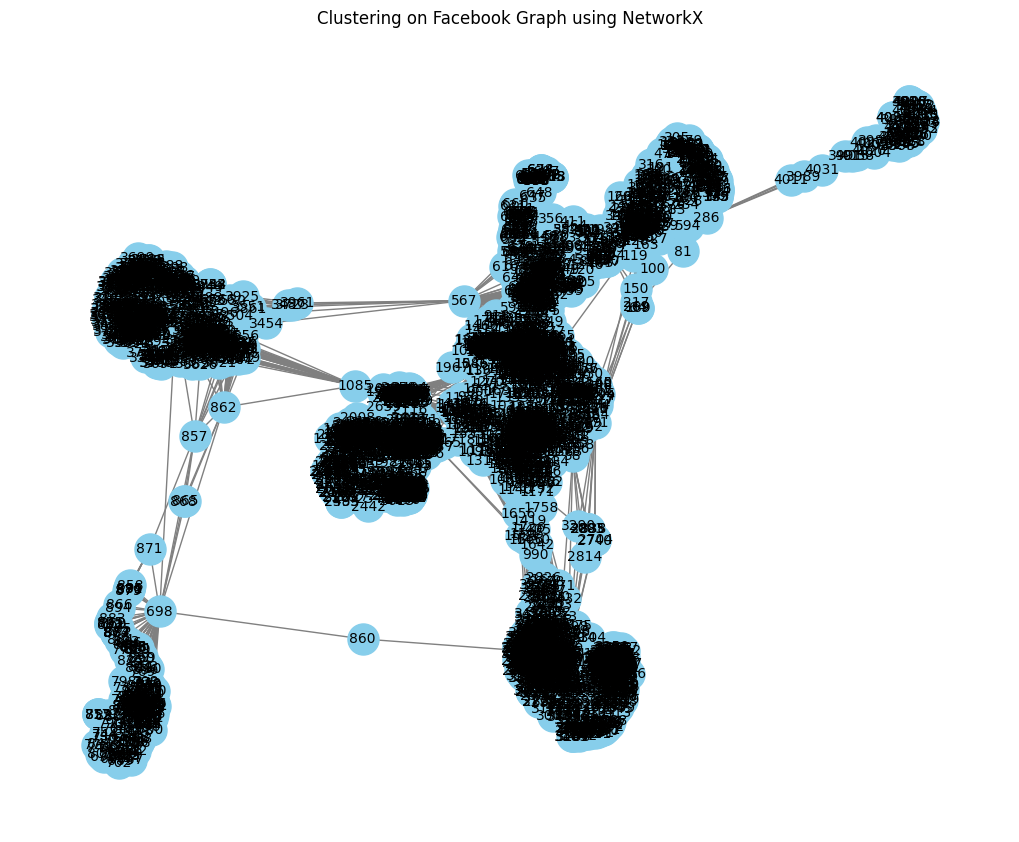

In [6]:
# Visualization of graph file facebook_combined.txt

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray', font_size=10)
plt.title('Clustering on Facebook Graph using NetworkX')
plt.show()

In [7]:
def extract_local_features(G):
    centralities = nx.degree_centrality(G)
    clustering_dict = nx.clustering(G)
    avg_neighbor_degree_dict = nx.average_neighbor_degree(G)

    extracted_features = []
    nodes = list(G.nodes())
    for node in nodes:
        degree = G.degree(node)
        centrality = centralities[node]
        avg_neighbor_degree = avg_neighbor_degree_dict[node] if node in avg_neighbor_degree_dict else 0
        clustering_coefficient = clustering_dict[node]
        pagerank = nx.pagerank(G)[node]
        triads = nx.triangles(G, node)
        squares = sum(1 for u, v in G.edges(node) for w in G.neighbors(v) if G.has_edge(u, w))

        node_features = [degree, centrality, avg_neighbor_degree, clustering_coefficient, pagerank, triads, squares]

        extracted_features.append(node_features)

    return extracted_features


sample_extracted_nodes = list(G.nodes())
current_graph_piece = G.subgraph(sample_extracted_nodes)
current_nodes = extract_local_features(current_graph_piece)
current_nodes = np.array(current_nodes)

current_nodes.shape

(4039, 7)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Scoring: 0.7940814499554608


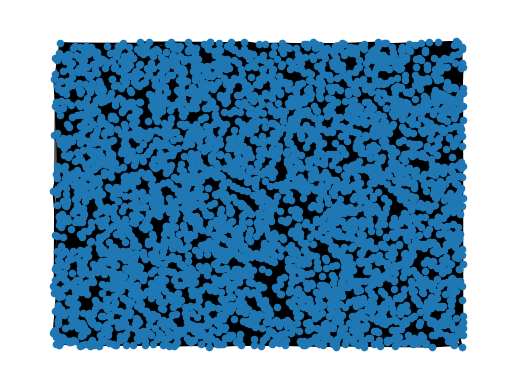

In [8]:
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

k = 4
kmeans_model = KMeans(n_clusters=k)
k_labels = kmeans_model.fit_predict(current_nodes)

silhouette = silhouette_score(current_nodes, k_labels)
print("Silhouette Scoring:", silhouette)
outputdf = pd.DataFrame(current_nodes)
outputdf[7] = k_labels
outputdf.head()
layout = nx.random_layout(current_graph_piece)
plt.axis('off')

nx.draw(current_graph_piece, pos=layout, node_size=20, width=0.9)
plt.show()


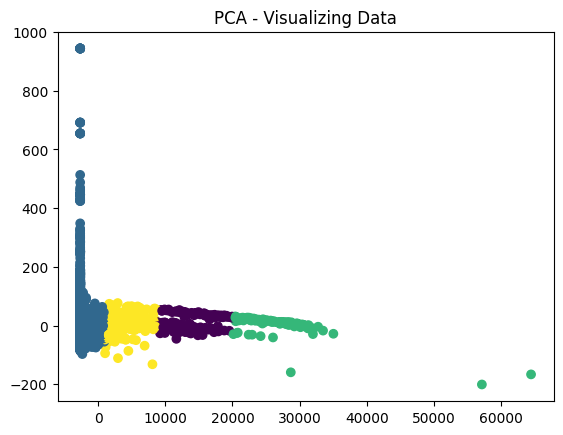

In [9]:
# PCA - Visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(outputdf)

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=k_labels, cmap='viridis')
plt.title('PCA - Visualizing Data')
plt.show()


Computing transition probabilities:   0%|          | 0/4039 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


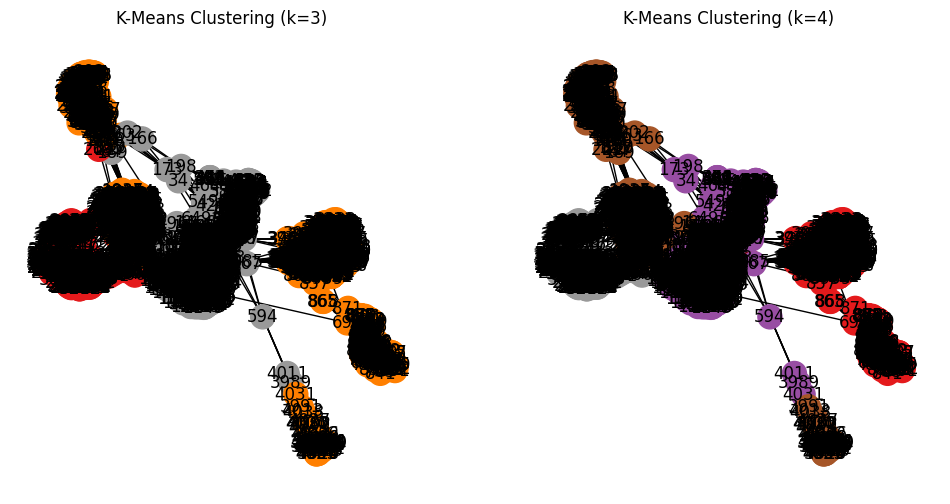

In [10]:
# K-Means clustering with k=3 and k=4

# Generate node embeddings using Node2Vec
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Get node embeddings
node_embeddings = [model.wv[str(node)] for node in G.nodes()]

# Apply K-Means clustering with k=3 and k=4
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(node_embeddings)
kmeans_4 = KMeans(n_clusters=4, random_state=0).fit(node_embeddings)

# Visualize the graph with nodes colored by cluster assignments
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=kmeans_3.labels_, cmap=plt.cm.Set1, with_labels=True)
plt.title('K-Means Clustering (k=3)')

plt.subplot(1, 2, 2)
nx.draw(G, pos, node_color=kmeans_4.labels_, cmap=plt.cm.Set1, with_labels=True)
plt.title('K-Means Clustering (k=4)')

plt.show()


In [11]:
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise).
# Extract features from the graph (e.g., using node degrees)

features = {node: len(list(G.neighbors(node))) for node in G.nodes()}
X = np.array(list(features.values())).reshape(-1, 1)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=2).fit(X)
cluster_labels = dbscan.labels_

# Get the total number of clusters
unique_clusters = np.unique(cluster_labels)
total_clusters = len(unique_clusters) - 1 if -1 in unique_clusters else len(unique_clusters)

print(f'DBSCAN-Total number of clusters found: {total_clusters}')

DBSCAN-Total number of clusters found: 4


<ipython-input-12-8590cc9a49d5>:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(adj_matrix, 'ward')


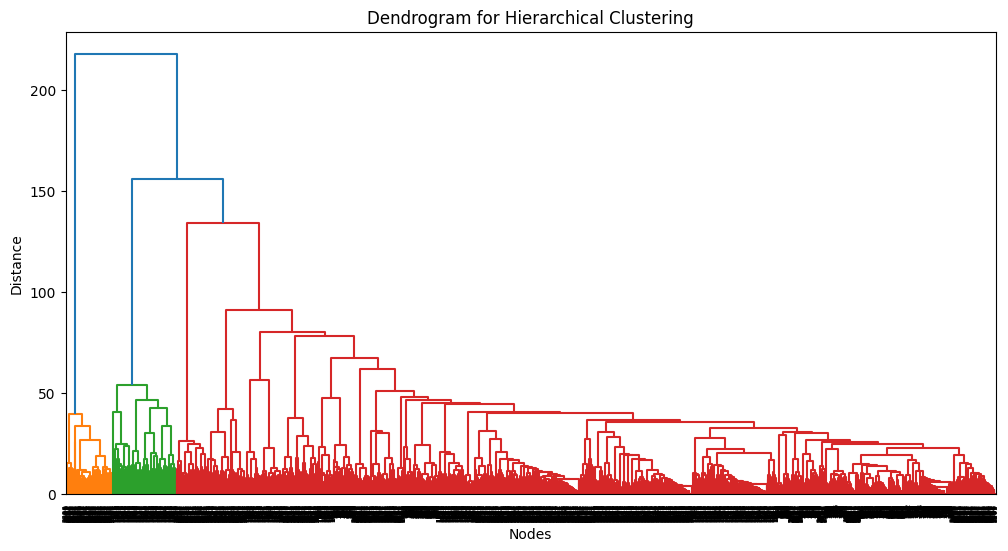

In [12]:
# Dendrogram for Hierarchical Clustering

# Create the adjacency matrix
adj_matrix = nx.to_numpy_matrix(G)

# Perform hierarchical clustering
Z = linkage(adj_matrix, 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=list(G.nodes), orientation='top', leaf_rotation=90)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Nodes')
plt.ylabel('Distance')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for 2 clusters: Davies-Bouldin=1.0388591252925365, Calinski=649.5554623000431, Rand=1.0, Adj Rand=1.0, Silhouette=0.4354049010877053


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for 3 clusters: Davies-Bouldin=1.3478415202271188, Calinski=483.42518720089384, Rand=1.0, Adj Rand=1.0, Silhouette=0.35414578714365663


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for 4 clusters: Davies-Bouldin=1.4773442198946256, Calinski=488.9893151487534, Rand=1.0, Adj Rand=1.0, Silhouette=0.36642245619803976


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for 5 clusters: Davies-Bouldin=1.685586150054998, Calinski=393.95787818969023, Rand=1.0, Adj Rand=1.0, Silhouette=0.25114189744921617


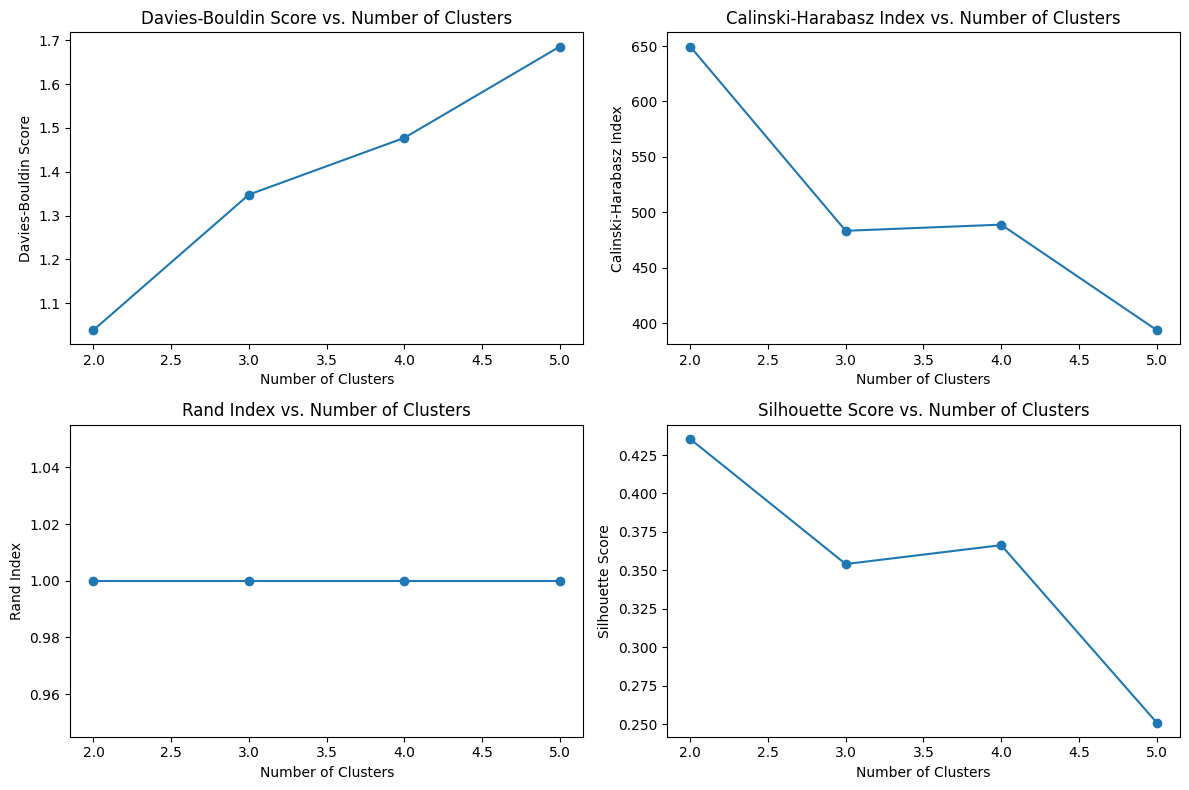

In [17]:
# Create the adjacency matrix
adj_matrix = np.asarray(nx.to_numpy_matrix(G))

# Initialize lists to store evaluation metrics
db_scores, ch_scores, rand_scores, adj_rand_scores, silhouette_scores = [], [], [], [], []

# Perform clustering for different number of clusters and calculate evaluation metrics
for n_clusters in range(2, 6):  # Trying clusters from 2 to 5
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(adj_matrix)

    # Davies-Bouldin Score
    db_score = davies_bouldin_score(adj_matrix, labels)
    db_scores.append(db_score)

    # Calinski-Harabasz Index
    ch_score = calinski_harabasz_score(adj_matrix, labels)
    ch_scores.append(ch_score)

    # Rand Index and Adjusted Rand Index
    rand_score_val = rand_score(labels, kmeans.labels_)
    rand_scores.append(rand_score_val)
    adj_rand_score_val = adjusted_rand_score(labels, kmeans.labels_)
    adj_rand_scores.append(adj_rand_score_val)

    # Silhouette Score
    silhouette_score_val = silhouette_score(adj_matrix, labels)
    silhouette_scores.append(silhouette_score_val)

    print(f"Metrics for {n_clusters} clusters: Davies-Bouldin={db_score}, Calinski={ch_score}, Rand={rand_score_val}, Adj Rand={adj_rand_score_val}, Silhouette={silhouette_score_val}")

# Plot the evaluation metrics
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(range(2, 6), db_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score vs. Number of Clusters')

plt.subplot(2, 2, 2)
plt.plot(range(2, 6), ch_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index vs. Number of Clusters')

plt.subplot(2, 2, 3)
plt.plot(range(2, 6), rand_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Rand Index')
plt.title('Rand Index vs. Number of Clusters')

plt.subplot(2, 2, 4)
plt.plot(range(2, 6), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS-Total number of clusters found: 1


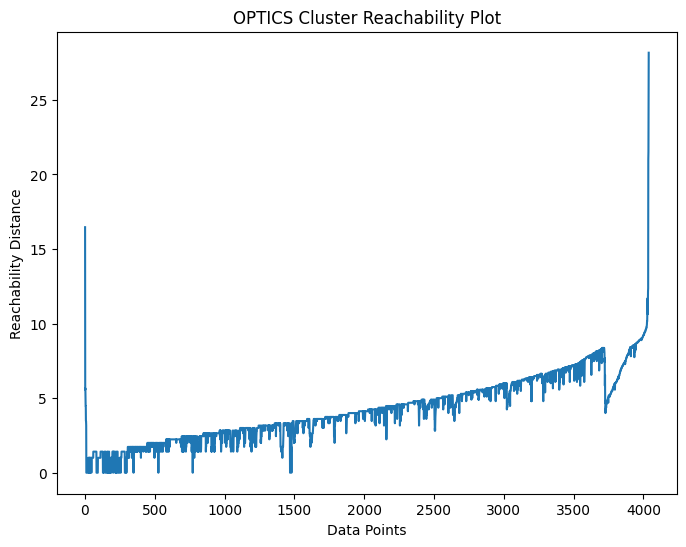

In [18]:
# OPTICS (Ordering Points To Identify the Clustering Structure)

from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Fit OPTICS clustering algorithm
optics = OPTICS(min_samples=2, xi=0.05, min_cluster_size=0.05)
optics.fit(adj_matrix)

# Get the cluster labels
optics_labels = optics.labels_

# Get the total number of clusters
unique_clusters_optics = np.unique(optics_labels)
total_clusters_optics = len(unique_clusters_optics) - 1 if -1 in unique_clusters_optics else len(unique_clusters_optics)

print(f'OPTICS-Total number of clusters found: {total_clusters_optics}')

# Plot the OPTICS cluster reachability plot
plt.figure(figsize=(8, 6))
plt.plot(optics.reachability_[optics.ordering_])
plt.title('OPTICS Cluster Reachability Plot')
plt.xlabel('Data Points')
plt.ylabel('Reachability Distance')
plt.show()


BIRCH - Total number of clusters found: 3


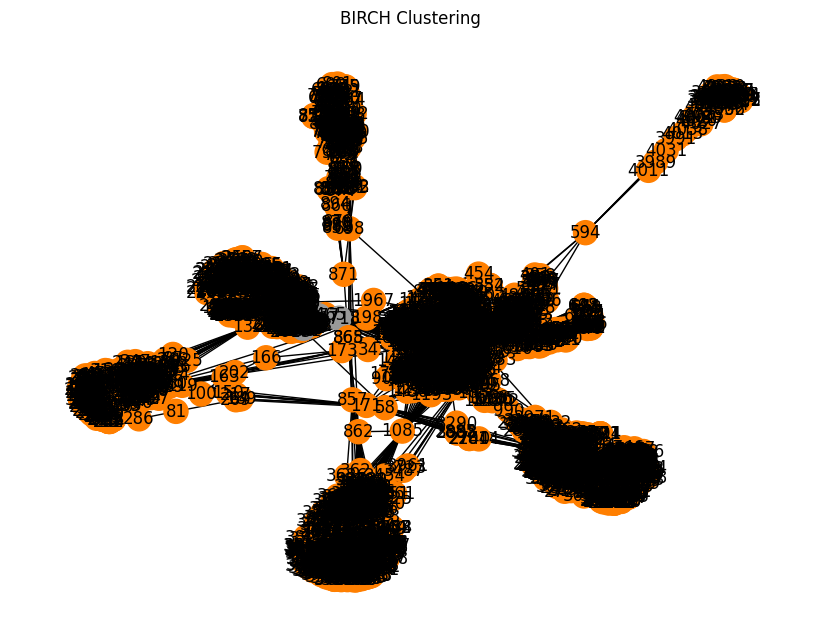

In [15]:
# BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)
# Extract features from the graph (e.g., using node degrees)
features = {node: len(list(G.neighbors(node))) for node in G.nodes()}
X = np.array(list(features.values())).reshape(-1, 1)

# Apply BIRCH clustering
birch = Birch(threshold=0.5, branching_factor=50, n_clusters=3)  # Define BIRCH parameters
birch_labels = birch.fit_predict(X)

# Get the total number of clusters
unique_clusters = np.unique(birch_labels)
total_clusters = len(unique_clusters)

print(f'BIRCH - Total number of clusters found: {total_clusters}')

# Visualize the graph with nodes colored by BIRCH cluster assignments
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=birch_labels, cmap=plt.cm.Set1, with_labels=True)
plt.title('BIRCH Clustering')
plt.show()
